# Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [2]:
# 1. Load the Iris dataset
iris = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [3]:
# Create a DataFrame with the dataset
df = pd.DataFrame(iris)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# Data Visualization: Distribution of features

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


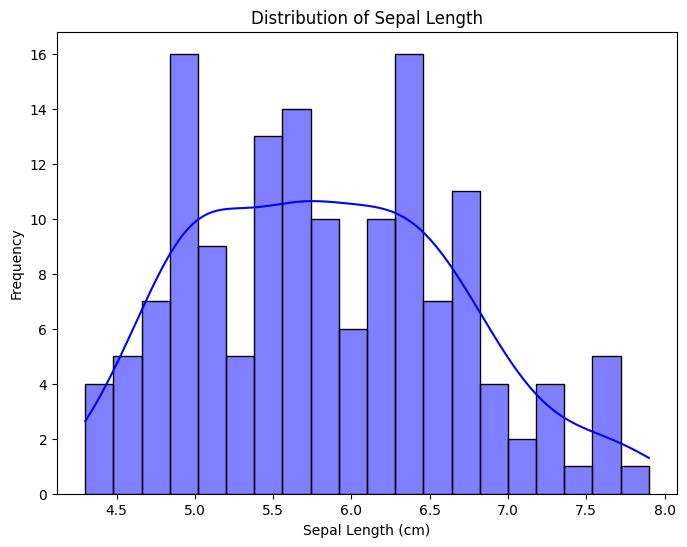

In [7]:
# Sepal Length Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sepal_length'], kde=True, color='blue', bins=20)
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


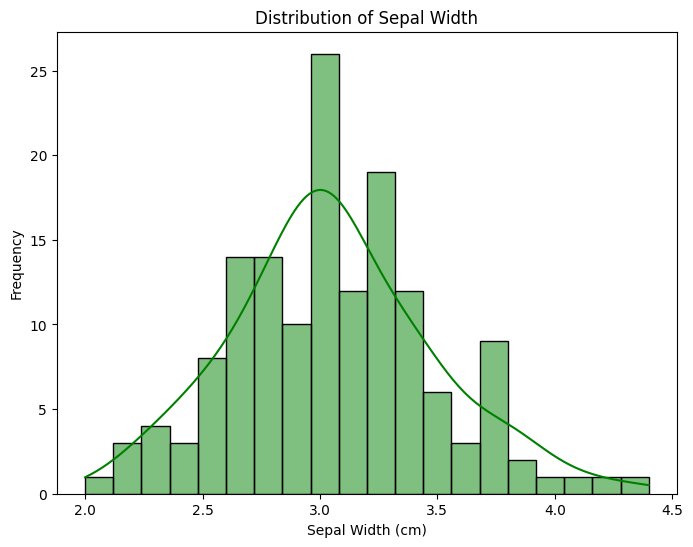

In [8]:
# Sepal Width Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sepal_width'], kde=True, color='green', bins=20)
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


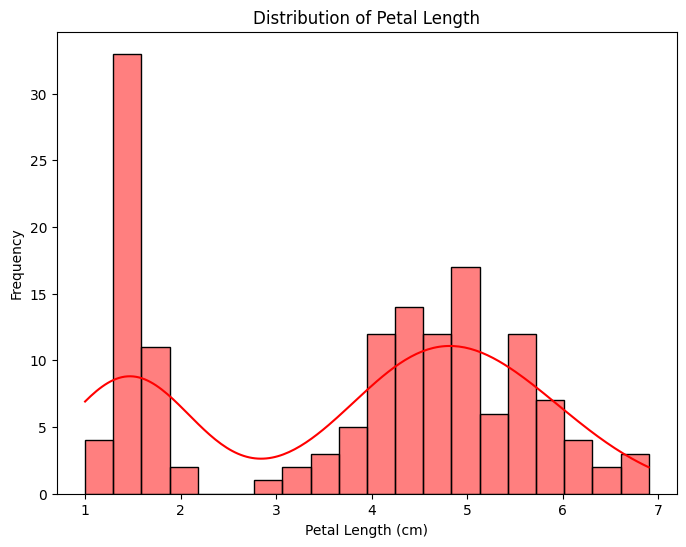

In [9]:
# Petal Length Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['petal_length'], kde=True, color='red', bins=20)
plt.title("Distribution of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


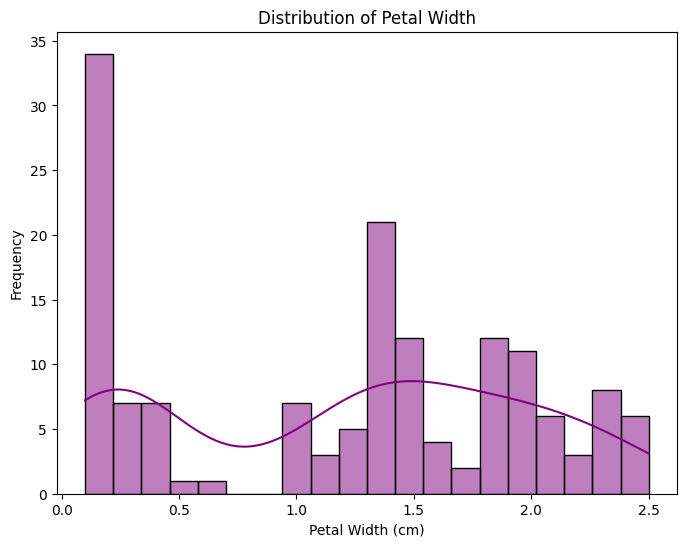

In [10]:
# Petal Width Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['petal_width'], kde=True, color='purple', bins=20)
plt.title("Distribution of Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")
plt.show()

**Correlation Matrix for Feature Relationships**

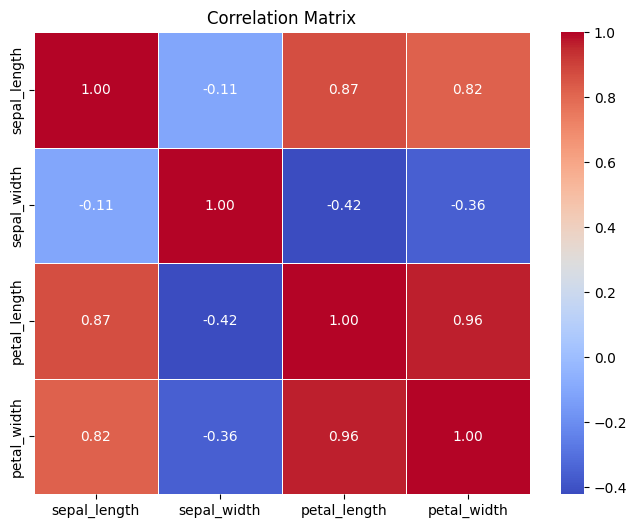

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=["species"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Modeling

In [12]:
X = df.drop(columns=['species'])  # Features
y = df['species']  # Target variable (species)

In [13]:
# 5. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature scaling**

In [14]:
# 6. Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import numpy as np

# Check training set distribution
print("Training class distribution:", np.unique(y_train, return_counts=True))

# Check test set distribution
print("Test class distribution:", np.unique(y_test, return_counts=True))

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Resampled class distribution:", np.unique(y_train_resampled, return_counts=True))


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Fit and transform training set
X_test = scaler.transform(X_test)  # Only transform test set

Training class distribution: (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([40, 41, 39]))
Test class distribution: (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([10,  9, 11]))
Resampled class distribution: (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([41, 41, 41]))


**Model: Random Forest**

In [16]:
# 7. Build and train the model (Random Forest in this case)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_test_pred = rf_model.predict(X_test)

Training Accuracy: 1.00
Testing Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



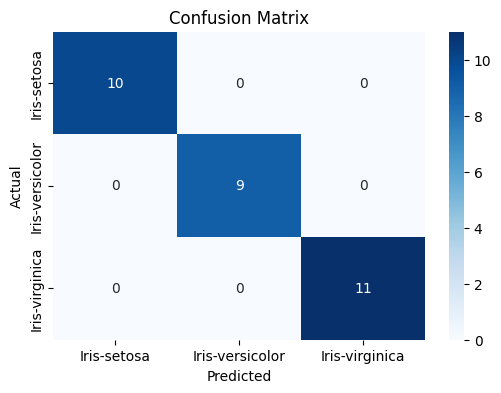

Cohen's Kappa Score: 1.00
Matthews Correlation Coefficient: 1.00


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy Scores
train_acc = rf_model.score(X_train_resampled, y_train_resampled)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Additional Metrics
kappa_score = cohen_kappa_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)

print(f"Cohen's Kappa Score: {kappa_score:.2f}")
print(f"Matthews Correlation Coefficient: {mcc:.2f}")

In [18]:
# 8. Evaluate the model
y_pred = model.predict(X_test_scaled)

NameError: name 'model' is not defined

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# Plot ROC Curve (Receiver Operating Characteristic Curve)
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Compute Training Accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute Testing Accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define class labels
class_labels = ['Setosa', 'Versicolor', 'Virginica']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

kappa_score = cohen_kappa_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)

print(f"Cohen's Kappa Score: {kappa_score:.2f}")
print(f"Matthews Correlation Coefficient: {mcc:.2f}")

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {cross_val_scores.mean() * 100:.2f}%")